In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Building the transition matrix

In [ ]:
n = 5000

def transition_matrix(n):
    A = np.zeros((n,n))

    A[0] = np.concatenate(([0.5, 0.5], [0] * (n-2)))
    A[-1] = np.concatenate(([0] * (n-2), [0.5, 0.5]))
    for i in range(1,n-1):
        A[i] = np.concatenate(([0]*(i-1), [1/3,1/3,1/3], [0]*(n-i-2)))
    return A

A = transition_matrix(n)
#print(A)

## Where the magic happens

In [ ]:
result = np.linalg.eig(A)
eigenvalues = result[0]
eigenvectors = result[1]

print(eigenvalues)
print(max(eigenvalues))

## Runtimes

In [4]:
#%timeit -r1 print(np.linalg.eig(A))

In [38]:
def f(n):
    return 1/3 + (2/3)*np.cos(np.pi/(n+1))

In [40]:
xcoords=list(range(5000,5001))
ycoords=[f(x) for x in xcoords]

| Input size | Runtime |
| --- | --- |
| $n = 2^{11}$ | ~10s |
| $n = 2^{12}$ | ~1min |
| $n = 2^{13}$ | ~7min |
| $n = 2^{14}$ | ~42min |
| $n = 2^{15}$ | breaks down, returns complex results |
| $n \geq 2^{16}$ | instant MemoryError |

## Second largest eigenvalues

In [ ]:
second_max = []

for n in range(5000, 5001):
    A = transition_matrix(n)
    eig = np.linalg.eig(A)[0]
    second_max.append(sorted(eig)[-2])
    

In [19]:
 len(second_max)

450

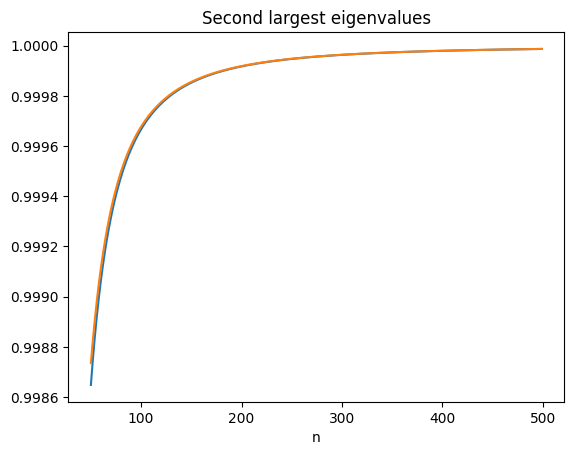

In [42]:
fig, ax = plt.subplots()
ax.plot(range(50,500), second_max)
ax.plot(xcoords, ycoords)
ax.set(xlabel='n', title='Second largest eigenvalues')
plt.show()